<a href="https://colab.research.google.com/github/Slaye-r/Relation-between-AL-indices-for-PCB/blob/main/Relation_Between_AL_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
data = pd.read_csv('pcb_data.csv')
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183


In [ ]:
data['AL25']=data['AL2']*data['AL5']
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632


In [ ]:
data['AL28']=data['AL2']*data['AL8']
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836


In [ ]:
data['sqrt_AL35']=(data['AL3']*data['AL5'])**0.5
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211


In [ ]:
data['sqrt_AL38']=(data['AL3']*data['AL8'])**0.5
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025


In [ ]:
data['sqrtAL45']=data['AL4']*(data['AL5']**0.5)
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509,92.040267
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313,90.525976
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298,90.464194
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538,104.512460
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025,104.250886


In [ ]:
data['sqrtAL48']=data['AL4']*(data['AL8']**0.5)
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45,sqrtAL48
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509,92.040267,91.463195
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313,90.525976,89.919093
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298,90.464194,90.073117
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538,104.512460,103.705326
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025,104.250886,103.448150


In [ ]:
data['sqrt_AL3']=data['AL3']**0.5
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45,sqrtAL48,sqrt_AL3
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509,92.040267,91.463195,11.180340
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313,90.525976,89.919093,10.862780
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298,90.464194,90.073117,10.862780
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538,104.512460,103.705326,12.124356
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025,104.250886,103.448150,12.083046


In [ ]:
data['AL57']=(data['AL7']*data['AL5'])
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45,sqrtAL48,sqrt_AL3,AL57
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509,92.040267,91.463195,11.180340,103.322964
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313,90.525976,89.919093,10.862780,102.460393
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298,90.464194,90.073117,10.862780,102.303411
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538,104.512460,103.705326,12.124356,118.747800
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025,104.250886,103.448150,12.083046,118.157762


In [ ]:
data['AL78']=(data['AL7']*data['AL8'])
data.head()

,no.,Mo lID,Molecule,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45,sqrtAL48,sqrt_AL3,AL57,AL78
0,1,PCB 001.HIN,"2-chloro-1,1’-biphenyl",36,82,125,40.3938,5.1919,29.5833,19.9008,5.1270,425.7358,420.4140,25.475233,25.315509,92.040267,91.463195,11.180340,103.322964,102.031402
1,2,PCB 002.HIN,"3-chloro-1,1’-biphenyl",36,80,118,39.4682,5.2608,29.5833,19.4762,5.1905,420.8640,415.2400,24.915345,24.748313,90.525976,89.919093,10.862780,102.460393,101.091216
2,3,PCB 003.HIN,"4-chloro-1,1’-biphenyl",36,80,118,39.6544,5.2044,29.0000,19.6571,5.1595,416.3520,412.7600,24.781429,24.674298,90.464194,90.073117,10.862780,102.303411,101.420807
3,4,PCB 004.HIN,"2,2’-dichloro-1,1’-biphenyl",40,92,147,45.1889,5.3490,32.0667,22.2000,5.2667,492.1080,484.5364,28.041095,27.824538,104.512460,103.705326,12.124356,118.747800,116.920740
4,5,PCB 005.HIN,"2,3-dichloro-1,1’-biphenyl",40,92,146,45.2854,5.2996,31.9500,22.2956,5.2183,487.5632,480.0836,27.816211,27.602025,104.250886,103.448150,12.083046,118.157762,116.345129


In [ ]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,no.,AL1,AL2,AL3,AL4,AL5,AL6,AL7,AL8,AL25,AL28,sqrt_AL35,sqrt_AL38,sqrtAL45,sqrtAL48,sqrt_AL3,AL57,AL78
no.,1.000000,0.968280,0.954135,0.936924,0.954509,0.903749,0.953441,0.954201,0.910479,0.958939,0.960905,0.951500,0.952452,0.959545,0.960227,0.940508,0.961764,0.963220
AL1,0.968280,1.000000,0.995063,0.985089,0.994652,0.919033,0.990472,0.993528,0.920667,0.995580,0.996600,0.993454,0.993818,0.997407,0.997566,0.987102,0.997251,0.997685
AL2,0.954135,0.995063,1.000000,0.996845,0.999631,0.889070,0.985909,0.998531,0.887928,0.994137,0.994946,0.996700,0.997030,0.998700,0.998778,0.996742,0.995746,0.995961
AL3,0.936924,0.985089,0.996845,1.000000,0.996357,0.868963,0.976789,0.995127,0.866401,0.988565,0.989204,0.994634,0.994939,0.993994,0.993997,0.997840,0.989911,0.989949
AL4,0.954509,0.994652,0.999631,0.996357,1.000000,0.881482,0.981882,0.999634,0.881614,0.992087,0.993285,0.994884,0.995525,0.998026,0.998339,0.996232,0.994813,0.995448
AL5,0.903749,0.919033,0.889070,0.868963,0.881482,1.000000,0.945079,0.873318,0.997797,0.929196,0.926766,0.912488,0.909849,0.907420,0.905397,0.873182,0.920199,0.916951
AL6,0.953441,0.990472,0.985909,0.976789,0.981882,0.945079,1.000000,0.977178,0.939146,0.994858,0.993646,0.990825,0.989420,0.989815,0.988646,0.978012,0.991037,0.989084
AL7,0.954201,0.993528,0.998531,0.995127,0.999634,0.873318,0.977178,1.000000,0.874711,0.989329,0.990910,0.992337,0.993285,0.996628,0.997173,0.994972,0.993165,0.994215
AL8,0.910479,0.920667,0.887928,0.866401,0.881614,0.997797,0.939146,0.874711,1.000000,0.927224,0.925831,0.910538,0.908693,0.906950,0.905525,0.871611,0.920188,0.918041
AL25,0.958939,0.995580,0.994137,0.988565,0.992087,0.929196,0.994858,0.989329,0.927224,1.000000,0.999850,0.996333,0.995847,0.997943,0.997419,0.986747,0.999150,0.998341


#       ***1.) AL1 relation with other Indices***


##A). AL2








In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:, 4].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.46215624844745257
0.5484106366995335


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
1,37,36
2,37,36
3,41,40
4,41,40
5,41,40
...,...,...
204,69,68
205,69,68
206,69,68
207,73,72


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.37910825]), 6.515636349625986)

In [ ]:
px.scatter(data, x='AL2', y='AL1')

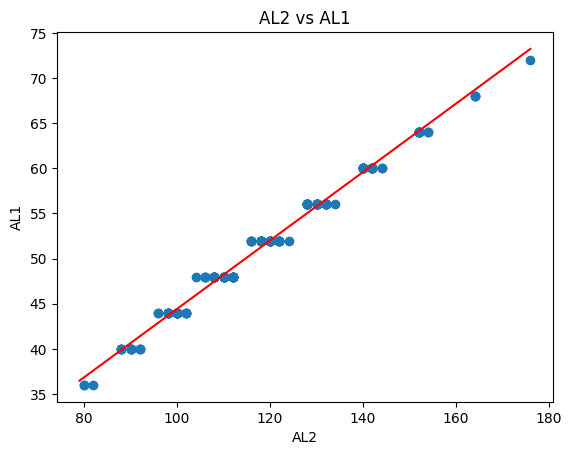

In [ ]:
x = np.linspace(79,176, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL2, data.AL1)
plt.plot(x,y, 'r')
plt.title("AL2 vs AL1")
plt.xlabel('AL2')
plt.ylabel('AL1')
plt.show()

In [ ]:
data['AL1'].corr(data['AL2'])

0.9950627758290994

## B). AL3

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:, 17].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

1.2025156327603124
0.8881289631708865


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
0,38,36
1,36,36
2,36,36
3,42,40
4,42,40
...,...,...
204,68,68
205,68,68
206,68,68
207,72,72


In [ ]:
regressor.coef_,regressor.intercept_

(array([4.69192435]), -14.825569138008234)

In [ ]:
px.scatter(data, x='sqrt_AL3', y='AL1')

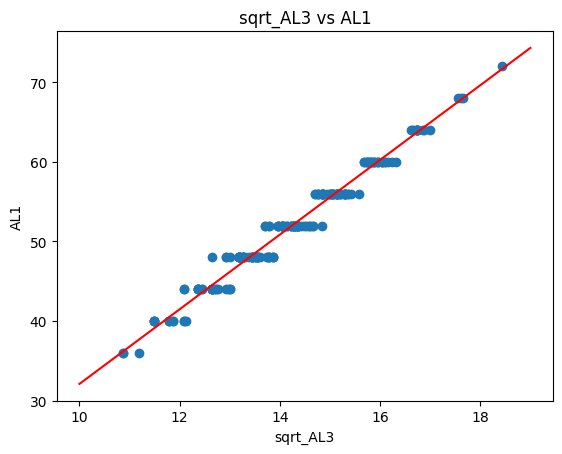

In [ ]:
x = np.linspace(10,19, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrt_AL3, data.AL1)
plt.plot(x,y, 'r')
plt.title("sqrt_AL3 vs AL1")
plt.xlabel('sqrt_AL3')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL3'])

0.9850889739030031

In [ ]:
data['AL1'].corr(data['sqrt_AL3'])

0.9871020364467784

##C.) AL4

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:,6].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.5004684654390865
0.5615661413439703


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
1,37,36
2,37,36
3,41,40
4,41,40
5,41,40
...,...,...
204,69,68
205,69,68
206,69,68
207,73,72


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.78149463]), 6.0337363753373054)

In [ ]:
px.scatter(data, x='AL4', y='AL1')

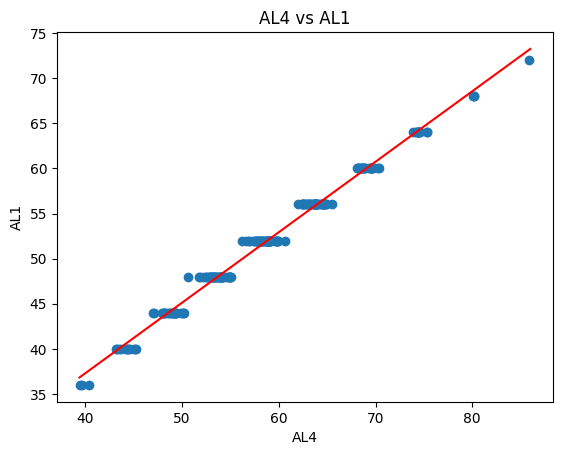

In [ ]:
x = np.linspace(39.4,86, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL4, data.AL1)
plt.plot(x,y, 'r')
plt.title("AL4 vs AL1")
plt.xlabel('AL4')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL4'])

0.9946523856517587

##D.) AL5

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:,7].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

7.290185531972074
2.1738702065357045


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,36,36
1,38,36
2,37,36
3,40,40
4,39,40
...,...,...
201,61,64
202,65,64
205,65,68
206,65,68


In [ ]:
regressor.coef_,regressor.intercept_

(array([23.44086101]), -85.4785736952343)

In [ ]:
px.scatter(data, y='AL1', x='AL5')

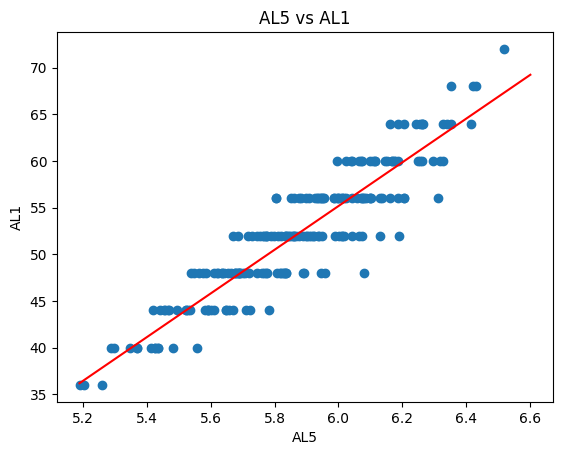

In [ ]:
x = np.linspace(5.19,6.6, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL5, data.AL1)
plt.plot(x,y, 'r')
plt.title("AL5 vs AL1")
plt.xlabel('AL5')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL5'])

0.9190332583123134

##E.) AL6

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:,8].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.889875446833769
0.7458113501854083


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,37,36
1,37,36
2,36,36
3,41,40
4,40,40
...,...,...
204,68,68
205,68,68
206,68,68
207,73,72


In [ ]:
regressor.coef_,regressor.intercept_

(array([1.63202727]), -11.735313547911097)

In [ ]:
px.scatter(data, y='AL1', x='AL6')

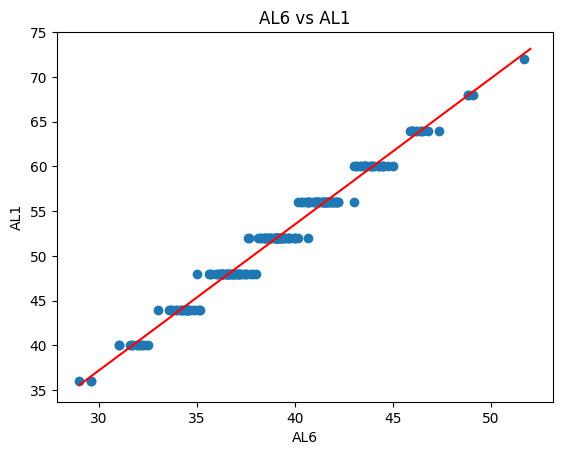

In [ ]:
x = np.linspace(29,52, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL6, data.AL1)
plt.plot(x,y, 'r')
plt.title( "AL6 vs AL1")
plt.xlabel('AL6')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL6'])

0.9904715153228579

##F.) AL7

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:,9].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.6053183094503143
0.6121411652733455


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
1,37,36
2,37,36
3,41,40
4,41,40
5,41,40
...,...,...
204,69,68
205,68,68
206,69,68
207,73,72


In [ ]:
regressor.coef_,regressor.intercept_

(array([1.60754141]), 5.626332718339853)

In [ ]:
px.scatter(data, y='AL1', x='AL7')

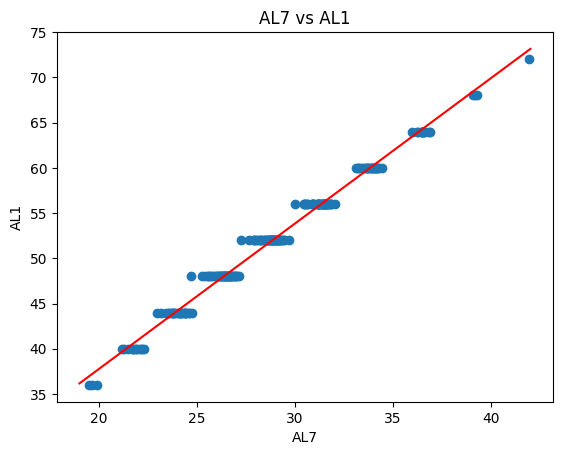

In [ ]:
x = np.linspace(19,42, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL7, data.AL1)
plt.plot(x,y, 'r')
plt.title( "AL7 vs AL1")
plt.xlabel('AL7')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL7'])

0.9935283955150317

##G.) AL8

In [ ]:
target = data.iloc[:, 3].values
train_data = data.iloc[:,10].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

7.149185933746111
2.155538877564759


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,36,36
1,37,36
2,37,36
3,39,40
4,38,40
...,...,...
201,62,64
202,64,64
205,65,68
206,65,68


In [ ]:
regressor.coef_,regressor.intercept_

(array([26.19227228]), -98.49215129865647)

In [ ]:
px.scatter(data, y='AL1', x='AL8')

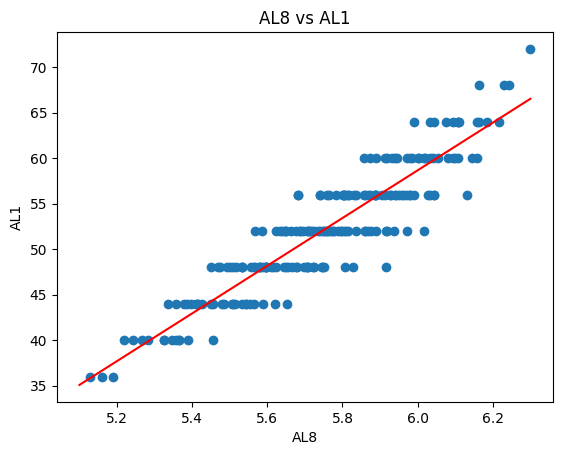

In [ ]:
x = np.linspace(5.1,6.3, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL8, data.AL1)
plt.plot(x,y, 'r')
plt.title( "AL8 vs AL1")
plt.xlabel('AL8')
plt.ylabel('AL1')
plt.show()

###Correlation

In [ ]:
data['AL1'].corr(data['AL8'])

0.9206667669816809

#2.) **AL2 relation with other indices**

##A.) AL3

In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,5].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

2.0362593789966668
1.1688548060965573


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
1,82,80
2,82,80
4,94,92
5,91,90
6,91,90
...,...,...
204,165,164
205,165,164
206,166,164
207,178,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.43295098]), 31.253060775703915)

In [ ]:
px.scatter(data, y='AL2', x='AL3')

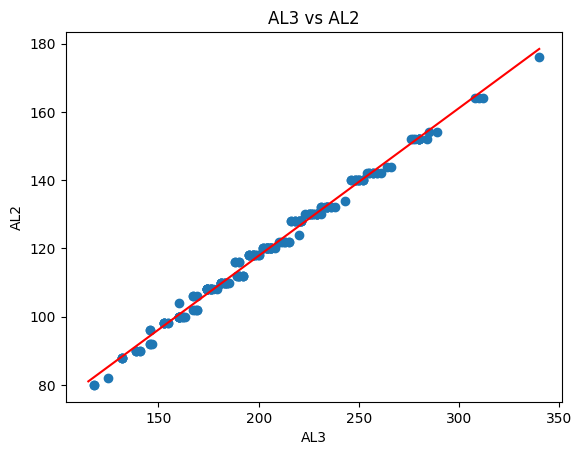

In [ ]:
x = np.linspace(115,340, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL3, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL3 vs AL2")
plt.xlabel('AL3')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL3'])

0.9968452512850677

##B.) AL4

In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,6].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.23851466638886973
0.3819274703653257


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,82,82
1,80,80
2,80,80
3,92,92
4,92,92
...,...,...
204,164,164
205,164,164
206,164,164
207,176,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([2.06149188]), -1.2764178183838624)

In [ ]:
px.scatter(data, y='AL2', x='AL4')

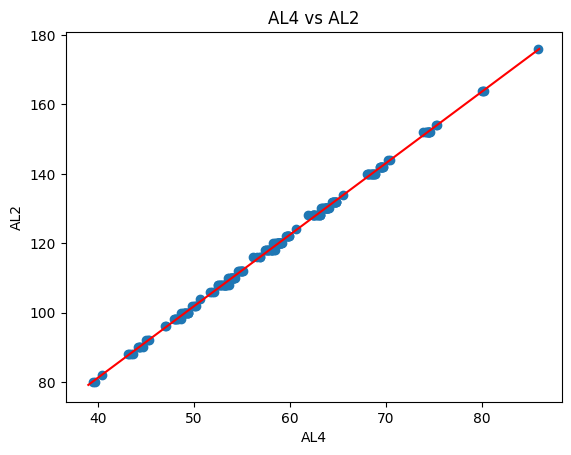

In [ ]:
x = np.linspace(39,86, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL4, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL4 vs AL2")
plt.xlabel('AL4')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL4'])

0.9996309872982068

##C.) AL5

In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,11].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

3.779110764296566
1.589384787519886


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,83,82
1,82,80
2,82,80
3,91,92
4,91,92
...,...,...
204,164,164
205,166,164
206,166,164
207,178,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.13192197]), 26.57564226243511)

In [ ]:
px.scatter(data, y='AL2', x='AL5')

In [ ]:
px.scatter(data, y='AL2', x='AL25')

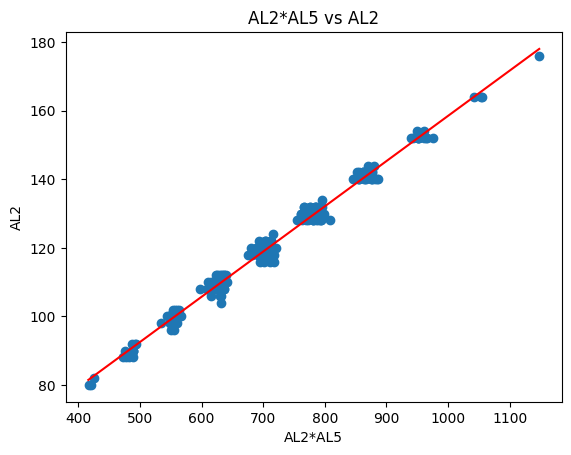

In [ ]:
x = np.linspace(416,1148, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL25, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL2*AL5 vs AL2")
plt.xlabel('AL2*AL5')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL5'])

0.8890699110234476

In [ ]:
data['AL2'].corr(data['AL25'])

0.9941371243006741

##D.) AL6

In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,8].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

9.045242639778605
2.3763827888883853


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,80,82
1,80,80
2,77,80
3,90,92
4,90,92
...,...,...
204,162,164
205,163,164
206,162,164
207,174,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([4.26392514]), -46.53877181904491)

In [ ]:
px.scatter(data, y='AL2', x='AL6')

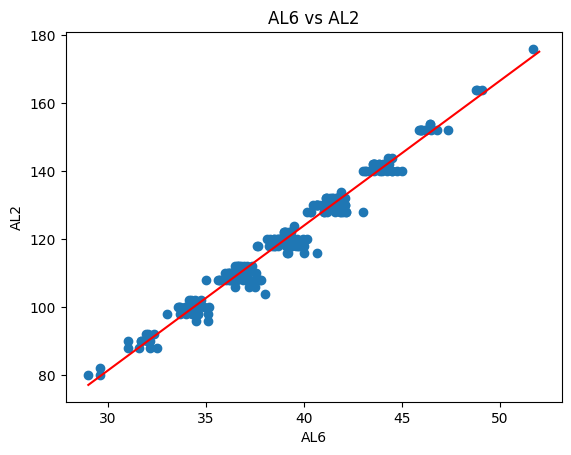

In [ ]:
x = np.linspace(29,52, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL6, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL6 vs AL2")
plt.xlabel('AL6')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL6'])

0.9859091585927396

##E.) AL7

In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,9].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.9487471599975855
0.761211010907593


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
0,82,82
1,80,80
2,81,80
3,92,92
4,92,92
...,...,...
204,164,164
205,163,164
206,164,164
207,175,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([4.24063451]), -2.3547827164744035)

In [ ]:
px.scatter(data, y='AL2', x='AL7')

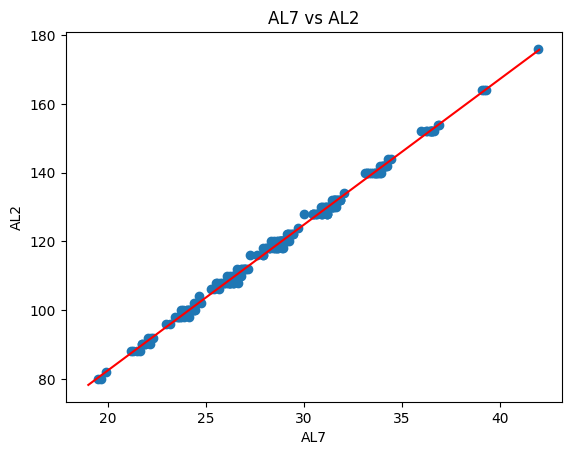

In [ ]:
x = np.linspace(19,42, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL7, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL7 vs AL2")
plt.xlabel('AL7')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL7'])

0.9985313591429889

##F.) AL8





In [ ]:
target = data.iloc[:, 4].values
train_data = data.iloc[:,12].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

3.259034225632937
1.4691778228460897


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,82,82
1,82,80
2,81,80
3,91,92
4,91,92
...,...,...
204,164,164
205,165,164
206,165,164
207,177,176


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.13754351]), 24.62552271026344)

In [ ]:
px.scatter(data, y='AL2', x='AL8')

In [ ]:
px.scatter(data, y='AL2', x='AL28')

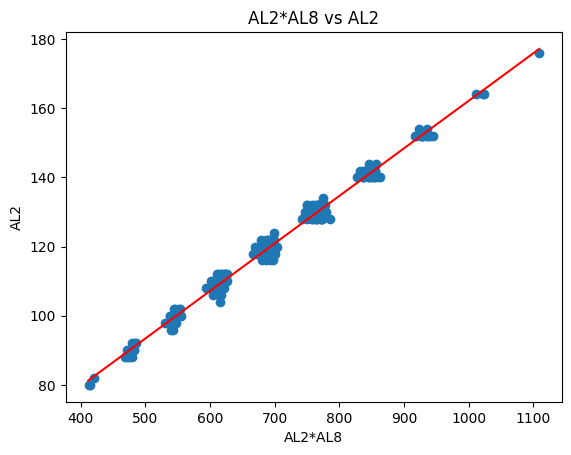

In [ ]:
x = np.linspace(412,1109, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL28, data.AL2)
plt.plot(x,y, 'r')
plt.title( "AL2*AL8 vs AL2")
plt.xlabel('AL2*AL8')
plt.ylabel('AL2')
plt.show()

###Correlation

In [ ]:
data['AL2'].corr(data['AL8'])

0.8879280646437864

In [ ]:
data['AL2'].corr(data['AL28'])

0.9949460160592271

#**3). AL3 relation with other indices**

##A.) AL4

In [ ]:
target = data.iloc[:, 6].values
train_data = data.iloc[:,5].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.5527154893619841
0.6058458058699542


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=3]

,Predictions,Target
0,42.046380,40.3938
1,40.577513,39.4682
2,40.577513,39.6544
3,46.662816,45.1889
4,46.452978,45.2854
...,...,...
204,80.446736,80.2246
205,80.866412,80.0299
206,81.286088,80.1503
207,87.161553,85.8802


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.20983801]), 15.816627739598687)

In [ ]:
px.scatter(data, y='AL4', x='AL3')

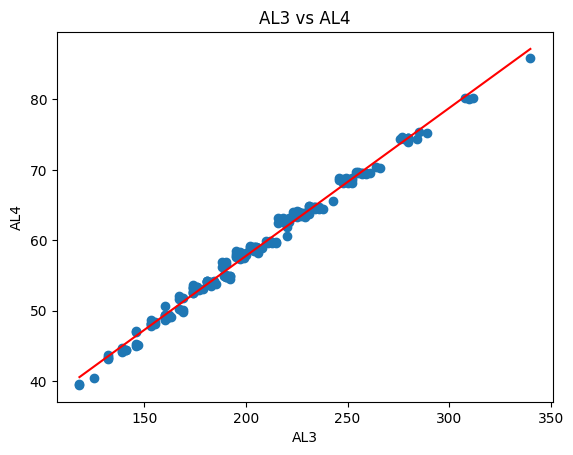

In [ ]:
x = np.linspace(118,340, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL3, data.AL4)
plt.plot(x,y, 'r')
plt.title( "AL3 vs AL4")
plt.xlabel('AL3')
plt.ylabel('AL4')
plt.show()

###Correlation

In [ ]:
data['AL3'].corr(data['AL4'])

0.9963573010399984

##B.) AL5

In [ ]:
target = data.iloc[:, 17].values
train_data = data.iloc[:,13].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.016982432800804578
0.10486187128200451


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=0.3]

,Predictions,Target
0,11.140542,11.180340
1,10.949250,10.862780
2,10.903497,10.862780
3,12.017197,12.124356
4,11.940363,12.083046
...,...,...
204,17.548907,17.549929
205,17.681203,17.606817
206,17.738751,17.663522
207,18.521435,18.439089


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.34166088]), 2.436651804580471)

In [ ]:
px.scatter(data, y='AL3', x='AL5')

In [ ]:
px.scatter(data, y='AL3', x='sqrt_AL35')

In [ ]:
px.scatter(data, y='sqrt_AL3', x='sqrt_AL35')

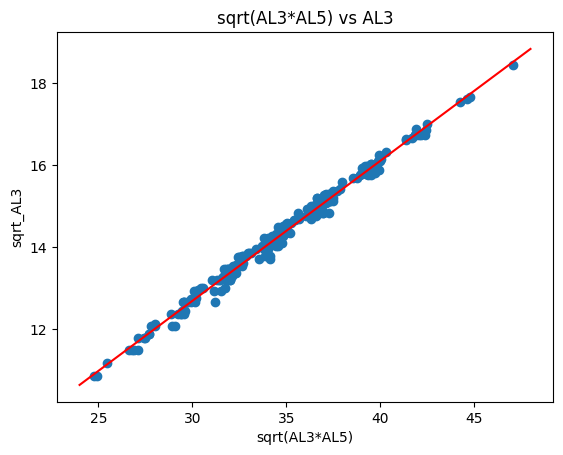

In [ ]:
x = np.linspace(24,48, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrt_AL35, data.sqrt_AL3)
plt.plot(x,y, 'r')
plt.title( "sqrt(AL3*AL5) vs AL3")
plt.xlabel('sqrt(AL3*AL5)')
plt.ylabel('sqrt_AL3')
plt.show()

###Correlation

In [ ]:
data['AL5'].corr(data['AL3'])

0.8689630989431667

In [ ]:
data['sqrt_AL35'].corr(data['AL3'])

0.9946340991949526

In [ ]:
data['sqrt_AL35'].corr(data['sqrt_AL3'])

0.9959027825871872

##C.) AL6

In [ ]:
target = data.iloc[:, 8].values
train_data = data.iloc[:,17].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.7516128415013342
0.6810102529405773


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
0,30.414198,29.5833
1,29.518271,29.5833
2,29.518271,29.0000
3,33.077540,32.0667
4,32.960993,31.9500
...,...,...
204,48.384654,48.8000
205,48.545151,49.0833
206,48.705132,48.8333
207,50.893232,51.6667


In [ ]:
regressor.coef_,regressor.intercept_

(array([2.82128976]), -1.1287806621090368)

In [ ]:
px.scatter(data, x='sqrt_AL3', y='AL6')

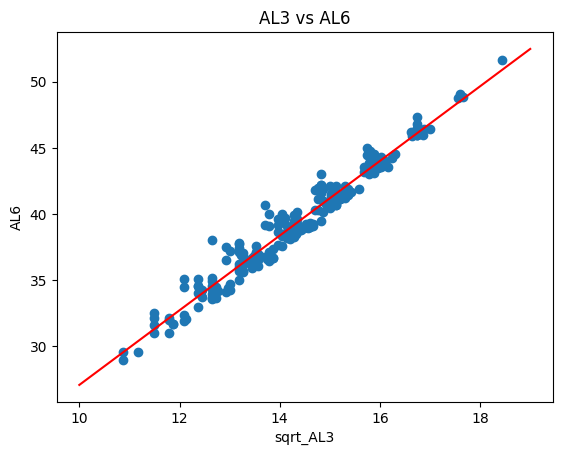

In [ ]:
x = np.linspace(10,19, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrt_AL3, data.AL6)
plt.plot(x,y, 'r')
plt.title( "AL3 vs AL6")
plt.xlabel('sqrt_AL3')
plt.ylabel('AL6')
plt.show()

###Correlation

In [ ]:
data['AL6'].corr(data['sqrt_AL3'])

0.9780119504835926

##D.) AL7

In [ ]:
target = data.iloc[:, 9].values
train_data = data.iloc[:,5].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.17425198959373847
0.33700921210871454


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,20.713390,19.9008
1,20.000999,19.4762
2,20.000999,19.6571
3,22.952332,22.2000
4,22.850562,22.2956
...,...,...
204,39.337319,39.2670
205,39.540859,39.0762
206,39.744400,39.1905
207,42.593962,41.9333


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.10177011]), 7.992126196359209)

In [ ]:
px.scatter(data, x='AL3', y='AL7')

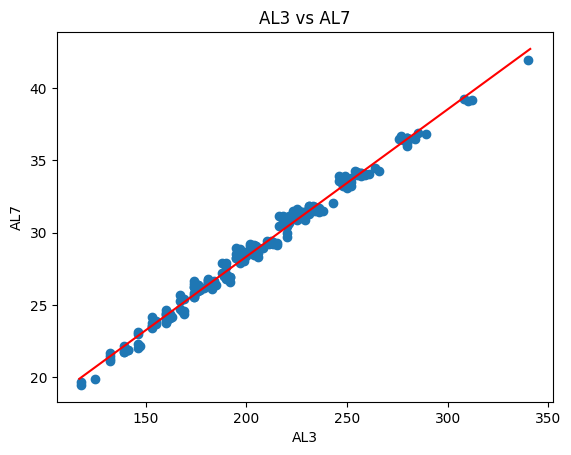

In [ ]:
x = np.linspace(117,341, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL3, data.AL7)
plt.plot(x,y, 'r')
plt.title( "AL3 vs AL7")
plt.xlabel('AL3')
plt.ylabel('AL7')
plt.show()

###Correlation

In [ ]:
data['AL7'].corr(data['AL3'])

0.9951267172029462

##E.) AL8

In [ ]:
target = data.iloc[:, 17].values
train_data = data.iloc[:,14].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.014730674250354136
0.09757468676128486


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=0.2]

,Predictions,Target
0,11.127980,11.180340
1,10.929070,10.862780
2,10.903114,10.862780
3,12.007874,12.124356
4,11.929841,12.083046
...,...,...
204,17.530830,17.549929
205,17.660975,17.606817
206,17.727351,17.663522
207,18.480645,18.439089


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.35069074]), 2.2500659876101654)

In [ ]:
px.scatter(data, x='AL3', y='AL8')

In [ ]:
px.scatter(data, y='sqrt_AL3', x='sqrt_AL38')

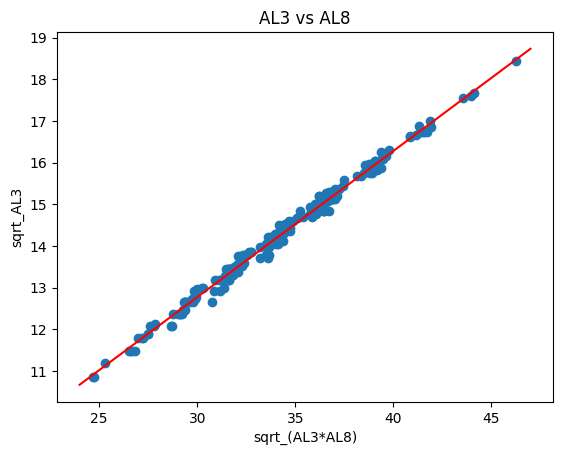

In [ ]:
x = np.linspace(24,47, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrt_AL38, data.sqrt_AL3)
plt.plot(x,y, 'r')
plt.title( "AL3 vs AL8")
plt.xlabel('sqrt_(AL3*AL8)')
plt.ylabel('sqrt_AL3')
plt.show()

###Correlation

In [ ]:
data['AL8'].corr(data['AL3'])

0.8664011748023047

In [ ]:
data['sqrt_AL38'].corr(data['sqrt_AL3'])

0.9964470153954846

#***4.) Al4 relation with other indices***

##A.) AL5

In [ ]:
target = data.iloc[:, 6].values
train_data = data.iloc[:,15].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.2998332615613171
0.44634212392273287


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,40.467679,40.3938
1,39.920663,39.4682
2,39.898345,39.6544
3,44.973081,45.1889
4,44.878591,45.2854
...,...,...
204,80.258802,80.2246
205,80.481910,80.0299
206,80.632676,80.1503
207,86.426572,85.8802


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.36123575]), 7.219444348033463)

In [ ]:
px.scatter(data, y='AL4', x='AL5')

In [ ]:
px.scatter(data, y='AL4', x='sqrtAL45')

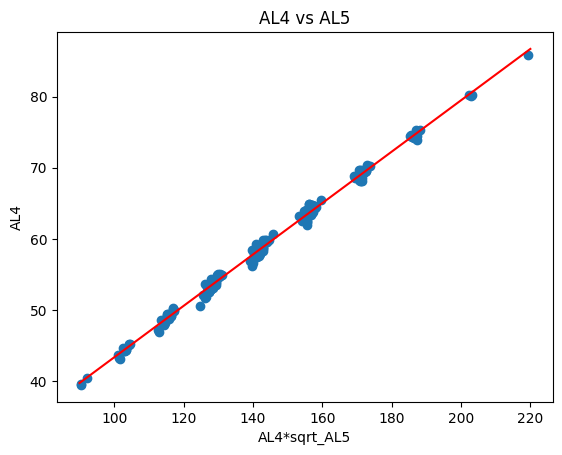

In [ ]:
x = np.linspace(90,220, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrtAL45, data.AL4)
plt.plot(x,y, 'r')
plt.title( "AL4 vs AL5")
plt.xlabel('AL4*sqrt_AL5')
plt.ylabel('AL4')
plt.show()

###Correlation

In [ ]:
data['AL5'].corr(data['AL4'])

0.8814823965566265

In [ ]:
data['sqrtAL45'].corr(data['AL4'])

0.9980255839042291

##B.) AL6

In [ ]:
target = data.iloc[:, 8].values
train_data = data.iloc[:,6].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.6205248480523462
0.614183312570534


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
0,30.427809,29.5833
1,29.994446,29.5833
2,30.081624,29.0000
3,32.672861,32.0667
4,32.718042,31.9500
...,...,...
204,49.076473,48.8000
205,48.985315,49.0833
206,49.041686,48.8333
207,51.724408,51.6667


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.46819706]), 11.515550596335032)

In [ ]:
px.scatter(data, y='AL6', x='AL4')

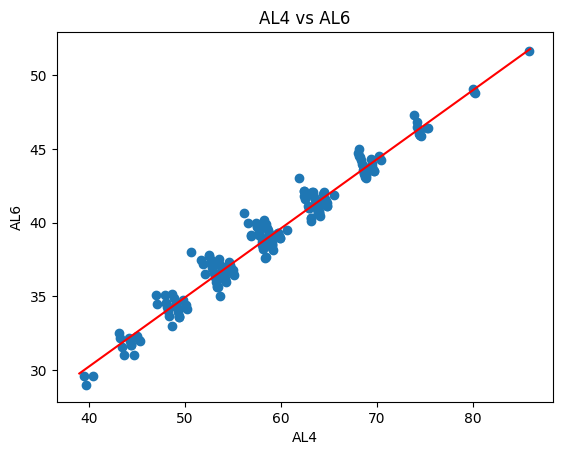

In [ ]:
x = np.linspace(39,86, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL4, data.AL6)
plt.plot(x,y, 'r')
plt.title( "AL4 vs AL6")
plt.xlabel('AL4')
plt.ylabel('AL6')
plt.show()

###Correlation

In [ ]:
data['AL6'].corr(data['AL4'])

0.9818823134890311

##C.) AL7

In [ ]:
target = data.iloc[:, 9].values
train_data = data.iloc[:,6].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.013099536540671126
0.0896060974401433


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=0.3]

,Predictions,Target
0,19.904067,19.9008
1,19.454766,19.4762
2,19.545151,19.6571
3,22.231685,22.2000
4,22.278528,22.2956
...,...,...
204,39.238571,39.2670
205,39.144061,39.0762
206,39.202505,39.1905
207,41.983890,41.9333


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.48541591]), 0.2962742124403519)

In [ ]:
px.scatter(data, y='AL7', x='AL4')

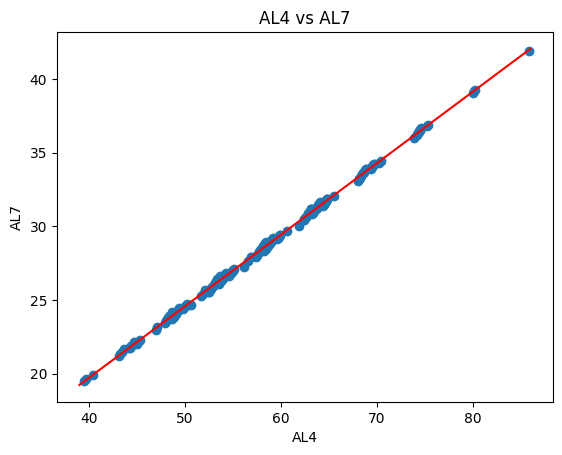

In [ ]:
x = np.linspace(39,86, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL4, data.AL7)
plt.plot(x,y, 'r')
plt.title( "AL4 vs AL7")
plt.xlabel('AL4')
plt.ylabel('AL7')
plt.show()

###Correlation

In [ ]:
data['AL7'].corr(data['AL4'])

0.9996344728261589

##D.) AL8

In [ ]:
target = data.iloc[:, 6].values
train_data = data.iloc[:,16].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.2523225231681388
0.40769484536321193


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,40.404048,40.3938
1,39.834090,39.4682
2,39.890943,39.6544
3,44.922854,45.1889
4,44.827925,45.2854
...,...,...
204,80.165619,80.2246
205,80.372856,80.0299
206,80.563746,80.1503
207,86.209678,85.8802


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.36911925]), 6.643221253472319)

In [ ]:
px.scatter(data, y='AL4', x='AL8')

In [ ]:
px.scatter(data, y='AL4', x='sqrtAL48')

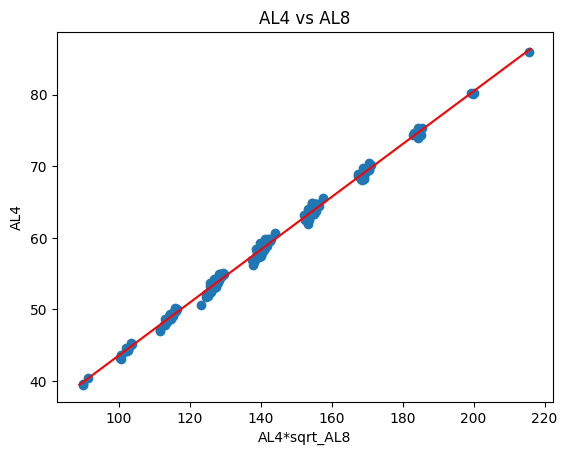

In [ ]:
x = np.linspace(89,216, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.sqrtAL48, data.AL4)
plt.plot(x,y, 'r')
plt.title( "AL4 vs AL8")
plt.xlabel('AL4*sqrt_AL8')
plt.ylabel('AL4')
plt.show()

###Correlation

In [ ]:
data['AL8'].corr(data['AL4'])

0.8816142256484492

In [ ]:
data['sqrtAL48'].corr(data['AL4'])

0.9983387046958554

#***5.) AL5 relation with other indices***

##A.) AL6

In [ ]:
target = data.iloc[:, 7].values
train_data = data.iloc[:,8].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.007704455669025871
0.07128089996470534


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=0.2]

,Predictions,Target
0,5.287264,5.1919
1,5.287264,5.2608
2,5.251652,5.2044
3,5.438885,5.3490
4,5.431760,5.2996
...,...,...
204,6.460512,6.3521
205,6.477809,6.4221
206,6.462545,6.4292
207,6.635535,6.5187


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.06105358]), 3.4810978353370183)

In [ ]:
px.scatter(data, y='AL5', x='AL6')

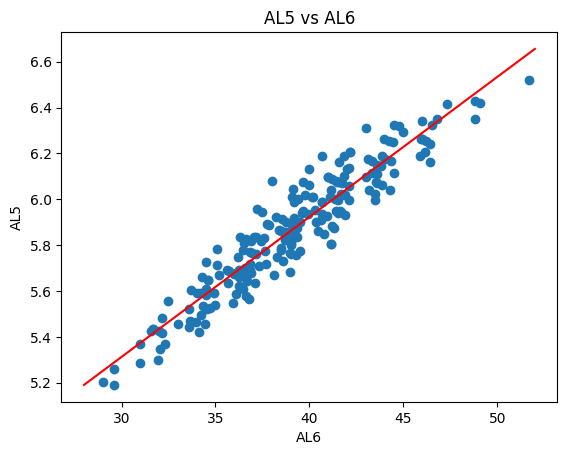

In [ ]:
x = np.linspace(28,52, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL6, data.AL5)
plt.plot(x,y, 'r')
plt.title( "AL5 vs AL6")
plt.xlabel('AL6')
plt.ylabel('AL5')
plt.show()

###Correlation

In [ ]:
data['AL6'].corr(data['AL5'])

0.945078801456071

##B.) AL7

In [ ]:
target = data.iloc[:, 9].values
train_data = data.iloc[:,18].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.24416704394653824
0.40288121631350937


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,20.050121,19.9008
1,19.936646,19.4762
2,19.915994,19.6571
3,22.079329,22.2000
4,22.001707,22.2956
...,...,...
204,39.270896,39.2670
205,39.471300,39.0762
206,39.604473,39.1905
207,42.418036,41.9333


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.13155458]), 6.457511456135027)

In [ ]:
px.scatter(data, x='AL5', y='AL7')

In [ ]:
px.scatter(data, x='AL57', y='AL7')

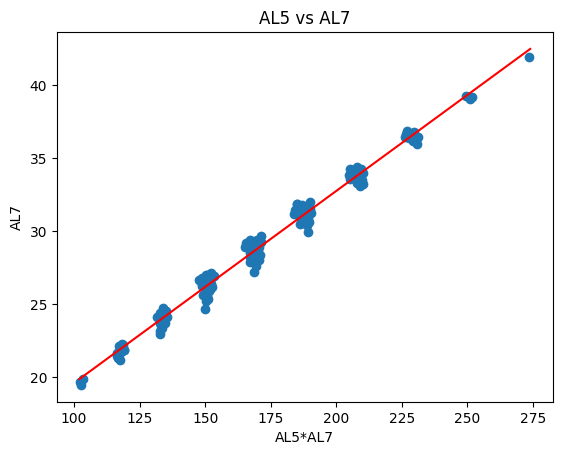

In [ ]:
x = np.linspace(102,274, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL57, data.AL7)
plt.plot(x,y, 'r')
plt.title( "AL5 vs AL7")
plt.xlabel('AL5*AL7')
plt.ylabel('AL7')
plt.show()

###Correlation

In [ ]:
data['AL7'].corr(data['AL5'])

0.8733182808247882

In [ ]:
data['AL7'].corr(data['AL57'])

0.9931646900331914

##C.) AL8

In [ ]:
target = data.iloc[:, 7].values
train_data = data.iloc[:,10].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.00031744291835632884
0.01447124342940304


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=0.03]

,Predictions,Target
0,5.176387,5.1919
1,5.247059,5.2608
2,5.212558,5.2044
3,5.331864,5.3490
4,5.277998,5.2996
...,...,...
203,6.195726,6.2049
204,6.330948,6.3521
205,6.403289,6.4221
206,6.418313,6.4292


In [ ]:
regressor.coef_,regressor.intercept_

(array([1.11293678]), -0.5296397341181924)

In [ ]:
px.scatter(data, y='AL5', x='AL8')

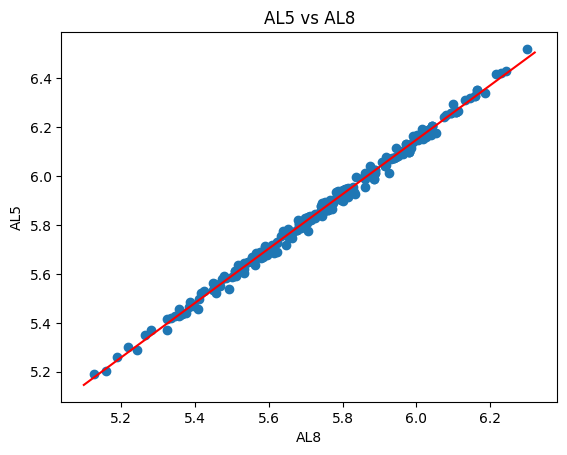

In [ ]:
x = np.linspace(5.1,6.32, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL8, data.AL5)
plt.plot(x,y, 'r')
plt.title( "AL5 vs AL8")
plt.xlabel('AL8')
plt.ylabel('AL5')
plt.show()

###Correlation

In [ ]:
data['AL8'].corr(data['AL5'])

0.9977968220748039

#***6.) AL6 relation with other indices***

##A.) AL7

In [ ]:
target = data.iloc[:, 8].values
train_data = data.iloc[:,9].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.7797869747377737
0.6847095907487327


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,30.469436,29.5833
1,30.062009,29.5833
3,32.675647,32.0667
4,32.767380,31.9500
5,32.214868,32.1667
...,...,...
204,49.052384,48.8000
205,48.869301,49.0833
206,48.978978,48.8333
207,51.610847,51.6667


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.95955571]), 11.373509985512865)

In [ ]:
px.scatter(data, y='AL6', x='AL7')

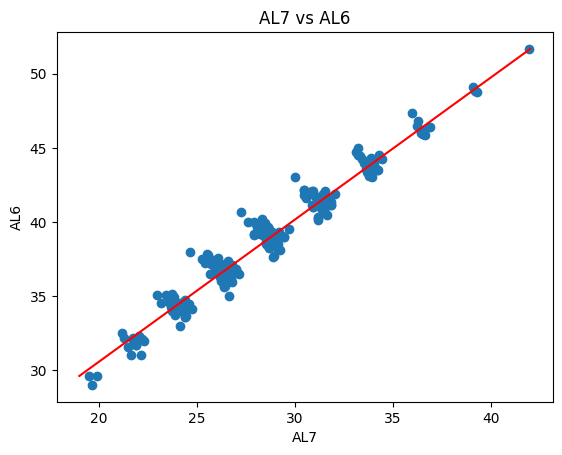

In [ ]:
x = np.linspace(19,42, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL7, data.AL6)
plt.plot(x,y, 'r')
plt.title( "AL7 vs AL6")
plt.xlabel('AL7')
plt.ylabel('AL6')
plt.show()

###Correlation

In [ ]:
data['AL6'].corr(data['AL7'])

0.9771781099374077

##B.) AL8

In [ ]:
target = data.iloc[:, 8].values
train_data = data.iloc[:,10].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

2.0392919468986417
1.1705929640731187


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=2]

,Predictions,Target
0,29.020477,29.5833
1,30.050133,29.5833
2,29.547466,29.0000
3,31.285719,32.0667
4,30.500911,31.9500
...,...,...
200,46.187351,46.0000
201,44.979330,45.9333
202,46.677046,47.3333
206,47.114852,48.8333


In [ ]:
regressor.coef_,regressor.intercept_

(array([16.2150511]), -54.11409022421934)

In [ ]:
px.scatter(data, y='AL6', x='AL8')

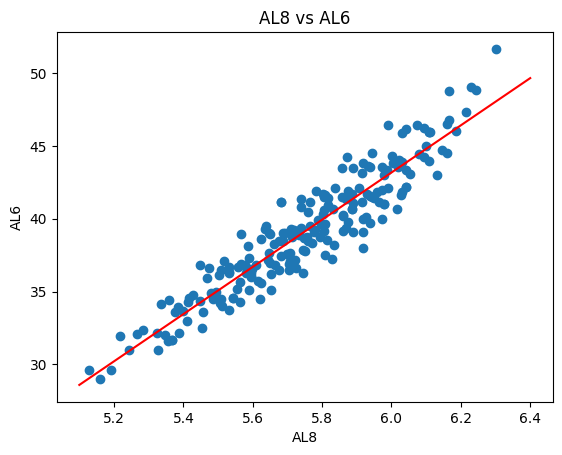

In [ ]:
x = np.linspace(5.1,6.4, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL8, data.AL6)
plt.plot(x,y, 'r')
plt.title( "AL8 vs AL6")
plt.xlabel('AL8')
plt.ylabel('AL6')
plt.show()

###Correlation

In [ ]:
data['AL6'].corr(data['AL8'])

0.9391458276701089

#***7.) AL7 relation with other indices***

##A.) AL8

In [ ]:
target = data.iloc[:, 9].values
train_data = data.iloc[:,19].values
train_data=train_data.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(train_data, target)
print(mean_squared_error(regressor.predict(train_data), target))
print(mean_absolute_error(regressor.predict(train_data), target))

0.20674901525035688
0.370078432319502


In [ ]:
predictions = pd.DataFrame({'Predictions':regressor.predict(train_data), 'Target':target})
#predictions.Predictions = predictions.Predictions.apply(lambda x:round(x))
predictions[abs(predictions.Predictions-predictions.Target)<=1]

,Predictions,Target
0,19.984022,19.9008
1,19.855067,19.4762
2,19.900274,19.6571
3,22.026229,22.2000
4,21.947279,22.2956
...,...,...
204,39.189862,39.2670
205,39.376918,39.0762
206,39.547145,39.1905
207,42.224134,41.9333


In [ ]:
regressor.coef_,regressor.intercept_

(array([0.13715901]), 5.989496270042203)

In [ ]:
px.scatter(data, y='AL7', x='AL8')

In [ ]:
px.scatter(data, y='AL7', x='AL78')

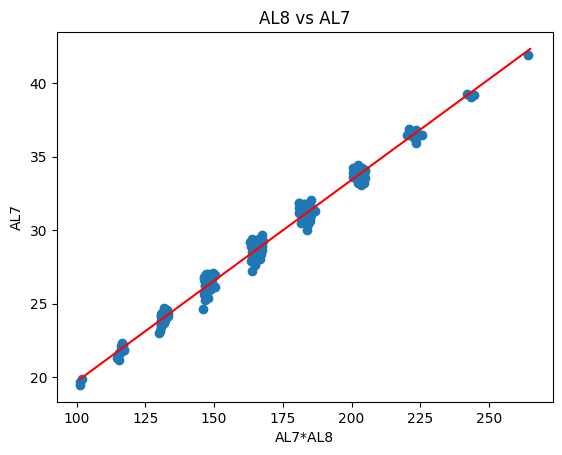

In [ ]:
x = np.linspace(101,265, 100).reshape(-1,1)
y = regressor.predict(x)
plt.scatter(data.AL78, data.AL7)
plt.plot(x,y, 'r')
plt.title( "AL8 vs AL7")
plt.xlabel('AL7*AL8')
plt.ylabel('AL7')
plt.show()

###Correlation

In [ ]:
data['AL8'].corr(data['AL7'])

0.874710827621597

In [ ]:
data['AL78'].corr(data['AL7'])

0.9942152343033662